<a href="https://colab.research.google.com/github/mopahlevani/Numerical-Methods/blob/main/0.%20Sample%20Final%20Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# REPLACE THIS TEXT YOUR NAME

Change the name of this notebook to  `yourname.ipynb` with *no spaces, no accents and no strange characters!*

## Questions

1. **Calculate numerically the integral of the function $f(x)=\sqrt{x}$ over the interval $x=[1,3]$.**

    *First provide a short description of the method you are going to use and then code it. Give the numerical value of the integral with an accuracy of 1%.*
    

Simpson's Rule is a numerical integration technique that approximates the integral of a function by dividing the interval
$[a,b]$ into an even number of subintervals, n, and fitting parabolic curves to the segments. This method is more accurate than the trapezoidal rule because it uses quadratic polynomials instead of linear ones.

In [8]:
def f(x):
  return x ** (1/2)

def simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule.")

    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n, 2):
        result += 4 * f(a + i * h)
    for i in range(2, n - 1, 2):
        result += 2 * f(a + i * h)
    return result * h / 3

n = 100000
a, b = 1, 3
print(simpson(f, a, b, n))

2.797434948471128


2. **Give a brief definition of "machine precision".**

Machine precision refers to the smallest difference between two numbers that a computer can distinguish due to its finite representation of numbers. This is determined by the format used for floating-point numbers, such as IEEE 754, which imposes limits on the range and precision of numbers that can be represented.


3. **Give a brief description what is meant by interpolation.**

Interpolation is the process of estimating the value of a function at a point within the range of known data points. It uses mathematical techniques to infer the missing value based on neighboring data, assuming a specific relationship between the points (e.g., linear or polynomial).

4. **The `python` function given below performs a linear regression on a set of data.**

    *a. Perform a fit on the data of your choice (make it up).*
    
    *b. Trace your data, the fit (on the same plot) and label the axes.*

In [15]:
def lin_reg(x_data, y_data):
    """ Fit a set of data using y = a0 + a1 * x

        input
        x_data: x-values of your data
        y_data: y-values of your data

        output:
        a0, a1
    """

    n = np.size(x_data)

    xm = np.mean(x_data)
    ym = np.mean(y_data)
    S1 = np.sum(x_data*y_data) - n*xm*ym
    S2 = np.sum(x_data**2) - n*xm**2

    a1 = S1/S2
    a0 = ym - a1*xm

    return (a0,a1)

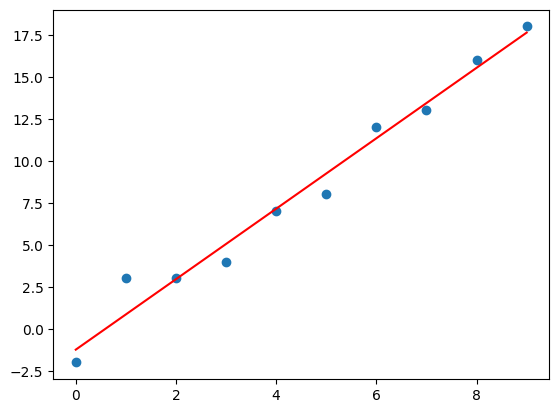

In [19]:
x_data = np.array([0,1,2,3,4,5,6,7,8,9])
y_data = np.array([-2,3,3,4,7,8,12,13,16,18])

a0, a1 = lin_reg(x_data, y_data)
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, a0 + a1*np.array(x_data), 'r')
plt.show()

5. **Let's consider a differential equation  in the form:
$\frac{dx}{dt}+\frac{d^2x}{dt^2}=-3x+kt$
where k is a constant.
Is it an ordinary or a partial differential equation ? Explain why**

The given equation is an ordinary differential equation (ODE) because it involves derivatives of a single dependent variable,
x(t), with respect to a single independent variable,
t. An ordinary differential equation involves only ordinary derivatives (as opposed to partial derivatives) because there is no dependence on multiple independent variables.

If there were another independent variable (e.g.,
y depending on both
t and another variable
s), the equation would involve partial derivatives, making it a partial differential equation (PDE).

6. **Let's consider a differential equation  in the form:
$\frac{df}{dt}-c\frac{df}{dx^2}=0$
Is it an ordinary or a partial differential equation ? Explain why**

The given equation is a partial differential equation (PDE) because the function f depends on two independent variables, t and x. As a result, the equation involves both partial derivatives with respect to t and x.

An equation is classified as a PDE when it includes partial derivatives with respect to multiple independent variables. If f depended only on t or x, the equation would be an ordinary differential equation (ODE).

7. **Consider a differential equation in the form: $\frac{dU}{dt}=-3U^2 $.
We want to solve it numerically starting from $U(t=0)=U_0$.
We will use a constant time step $dT$.**

    **Give the details and discuss a simple  algorithm, of order 1, to find the value of $U(t)$ at all times $T=n \times dT$, where n is a postivie integer number.**

ANSWER :

8. **Code this algorithm starting from $U_0=1.0$ and use $dT=0.01$, and display the result over the interval $T=[0,10]$. Label the axes.**


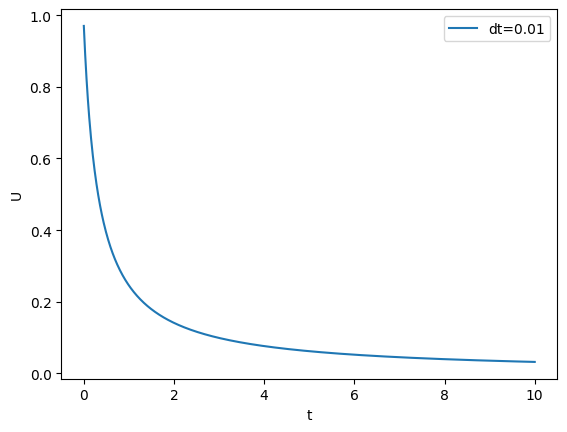

In [49]:
def deriv(u,t):
    return -3 * u**2

T=[]
U=[]
t = 0
u = 1.0
dt = 0.01
while t < 10:
    f = deriv(u,t)
    u = u + f * dt
    U.append(u)
    T.append(t)
    t = t + dt
plt.plot(T, U, label=f'dt={dt}')
plt.xlabel('t')
plt.ylabel('U')
plt.legend()
plt.show()

9. **Now do redo the same calculation as above, but with $dT=0.5$. What do you see?**

    **Propose possible solutions to cure this problem (no need to write code for the moment).**

In [48]:
def deriv(u,t):
  f = -3 * u**2
  return f

T=[]
U=[]
t = 0
u = 1.0
dt = 0.5
while t < 10:
    f = deriv(u,t)
    u = u + f * dt
    U.append(u)
    T.append(t)
    t = t + dt
plt.plot(T, U, label=f'dt={dt}')
plt.xlabel('t')
plt.ylabel('U')
plt.legend()
plt.show()

OverflowError: (34, 'Numerical result out of range')

When dt=0.5, the Euler method becomes unstable for the equation
du=-3u^2, causing rapid exponential growth in u due to large step sizes inaccurately approximating the solution. This instability leads to an OverflowError as u quickly exceeds the representable range of floating-point numbers. The problem arises because Euler's method assumes linear behavior over each time step, which fails for equations with quadratic growth like this one. To fix this, the step size dt should be reduced (e.g.,
dt=0.01) to improve stability. Alternatively, more stable numerical methods, such as Runge-Kutta (RK4) or backward Euler, can be used to handle larger time steps effectively. Adaptive step sizing is another approach to dynamically control
dt based on the rate of change in u, ensuring accuracy without unnecessary computational overhead.

10. **We propose to cure this problem with a second order solver in the form:**
$$ k1=U(t)+dt/2*F(U,t) $$  **and**
$$U(t+dt)=U(t)+dt \times F(k1,t+dt/2)$$

**What solver is this? What is its order (no need to justify)? How is it called?**
    

It's Runge-Kutta Order 2 or Midpoint solver.

11. **Code this solver and find the $U(t)$ numerically using $dT=0.01$ and then $dT=0.5$. What do you see? What do you conclude?**

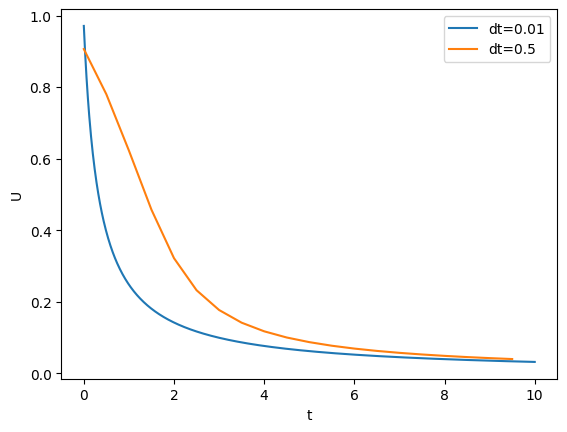

In [63]:
def deriv(u,t):
  f = -3 * u**2
  return f


for dt in [0.01,0.5]:
  T=[]
  U=[]
  t = 0
  u = 1.0
  while t < 10:
    k1 = u + dt/2 * deriv(u,t)
    u = u + dt * deriv(k1, t+ dt/2)
    U.append(u)
    T.append(t)
    t = t + dt
  plt.plot(T,U,label=f'dt={dt}')
plt.xlabel('t')
plt.ylabel('U')
plt.legend()
plt.show()

12. **Explain the difference between and explicit and implicit solver . Detail the Implicit Euler solver for a differential equation of the form :  $\frac{dU}{dt}=F(U)$ where F is an arbitrary function.**

Explicit solvers predict the next value ($u_{new}$) using the slope and function value at the current time (t), making them computationally faster and easier to implement. However, they can become unstable for stiff equations or large time steps. In contrast, implicit solvers calculate the next value by considering the function and slope at t+Δt, requiring additional calculations (often solving nonlinear equations) but offering greater stability for stiff equations or larger time steps. \\
Explicit: u_new = u + f(u,t) * dt \\
Implicit: u_new = u + dt * f(u_new,t+dt)

13. **Consider the same equation of above :
$$\frac{dU}{dt}=-2.\times U$$.
We want to solve it numerically starting from $U(t=0)=U_0$, but using an $\textit{implicit}$ method.**

    **Explain and detail a simple  algorithm, of order 1, to find the value of $U(t)$ at all times $T=n \times dT$ using the implicit euler solver (do not code it). In other words, explain how you compute $U(n+1)$ as a function of $U(n)$ and $dT$ using implicit Euler.**

ANSWER :

$U_{n+1} = U_{n} + Δt . (-2 * U_{n+1})$ \\

$ U_{n+1} = \frac{U_{n}}{1+2Δt}$


14. **We now consider a partial differential equation in the form:**


$$\frac{\partial U}{\partial t}+U \frac{ \partial U}{\partial x} =0$$
    **where $U$ is a function of space and time $U(x,t)$. When $U$ is a velocity, this equation is called "Burgers' Equation". This is a partial differential equations. What information is missing to properly solve this equation? In other words, what do you need to know before you start to try to solve this equation?**


To solve the Burgers' equation $$\frac{\partial U}{\partial t}+U \frac{ \partial U}{\partial x} =0$$, the following information is required:
1.   Initial Conditions: U(x,0), which describes the initial state of U over the spatial domain.
2.   Boundary Conditions: Values of U at the boundaries of the domain (x min and x max) for all times t. These conditions ensure the problem is well-posed and physically meaningful. Without both initial and boundary conditions, the equation cannot be solved uniquely.



15. **We call $U^k_n=U( t=n\times dt, x=k\times dx)$ the value of $U$ at time $t$ and location $x$.
What are $dt$ and $dx$?**

Δt represents the time step, which is the smallest increment in time used for solving the equation numerically, and Δx represents the spatial step, which is the smallest increment in space. These steps divide the solution domain into a grid where n indexes time and k indexes space. The solving process involves calculating the value of
U at each grid point (n,k), effectively creating a mesh of rectangles with Δt and Δx as their respective dimensions. These steps determine the resolution of the numerical solution.

16. **What relation should exist between  dt,  dx and the velocity U if you use an explicit solver? How is it called ?**

It is called the CFL Condition; which states $ c = \frac{udt}{dx}$ The condition $C =< 1$ ensures the answer stays stable.

17. **Give a 1st order approximation of $\frac{\partial U}{\partial t}$ using the forward difference (as a function of $U^{k}_{n}$ ,$U^{k}_{n+1}$ etc..  )**

$  \frac{\partial U}{\partial t} = \frac{{U^{k}_{n+1} - U^{k}_{n}}}{dt}  $

18. **Give a 1st order approximation of $\frac{\partial U}{\partial x}$ using the backward difference(as a function of $U^{k+1}_{n}$ or $U^{k-1}_{n}$ etc..)**

Forward:  $  \frac{\partial U}{\partial x} = \frac{{U^{k+1}_{n} - U^{k}_{n}}}{dx}  $

Backward:  $  \frac{\partial U}{\partial x} = \frac{{U^{k}_{n} - U^{k-1}_{n}}}{dx}  $

19. **Using your two previous answers propose a discretization of equation : $\frac{\partial U}{\partial t}+U \frac{ \partial U}{\partial x} =0$**

$ \frac{{U^{k}_{n+1} - U^{k}_{n}}}{dt}  + U * \frac{{U^{k}_{n} - U^{k-1}_{n}}}{dx} = 0 $ \\

$ \frac{{U^{k}_{n+1} = U^{k}_{n}}}{dt}  + C ({{U^{k}_{n} - U^{k-1}_{n}}}) = 0 $